## Parcial 1

### Importación de librerías 

In [ ]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
# Para resampling
from sklearn.utils import resample 
#Librerías para la visualización
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn
import seaborn as sns 
from sklearn import tree
seed = 117
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

### 2. Carga de los datos

In [ ]:
# Se cargan los datos. 
#los atributos 'sep' y 'encoding' son para verificar el formato de los datos, por ejemplo
#si los datos vienen separados por ; en ves de , se puede cambiar aqui y evitar problemas en el cargue
#el 'index_col' indica en que columna se encuentra el 'indice' de los datos 
df=pd.read_csv('Datos_EmpleadosAlpes.csv', sep=';', encoding = 'utf-8')
df = df.drop_duplicates(subset=['ID_empleado'])

In [ ]:
# Cantidad de datos y número de variables
df.shape

(736, 18)

In [ ]:
df.set_index("ID_empleado",inplace = True)

In [ ]:
# Mostrar los datos
df.head()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
ID_empleado,,,,,,,,,,,,,,,,,
471,29,Pocos,NO,5,3,Hombre,1.0,3,Soltero,2140,Si,80,0,7,6,1.0,0
1747,30,Frecuentes,NO,8,3,Mujer,2.0,4,Divorciado,2180,No,80,1,6,4,2.0,2
825,58,Pocos,NO,2,4,Hombre,3.0,2,Soltero,19246,Si,80,0,40,31,15.0,8
328,33,Pocos,NO,2,1,Mujer,3.0,1,Casado,2707,No,80,0,13,9,7.0,7
55,26,Pocos,NO,25,1,Hombre,1.0,3,Soltero,2293,No,80,0,1,1,0.0,1


In [ ]:
# ver los tipos de todas la variables.
df.dtypes

Edad                       int64
ViajesNegocio             object
PermaneceEnEmpresa        object
Distancia_casa             int64
Satisfacción_ambiente      int64
Genero                    object
Compromiso               float64
Satisfaccion_trabajo       int64
Estado_civil              object
Ingreso_mensual            int64
SobreTiempo               object
Horas_Produccion           int64
Bonos                      int64
Años_trabajando            int64
Años_Compañia              int64
Años_Rol_Actual          float64
Años_Actual_Jefe           int64
dtype: object

In [ ]:
# descripción de los datos
df.describe()

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
count,736.000000,736.000000,736.000000,728.000000,736.000000,736.000000,736.0,736.000000,736.000000,736.000000,730.000000,736.000000
mean,35.974185,9.547554,2.618207,2.657967,2.668478,5976.361413,80.0,0.728261,10.254076,6.698370,3.832877,3.701087
std,9.446052,7.982322,1.112524,0.730391,1.086158,4490.221131,0.0,0.864769,7.642122,7.548757,3.520197,3.439712
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,3.000000,2.000000,2.000000,2.000000,2652.250000,80.0,0.000000,5.000000,2.000000,2.000000,1.000000
50%,34.000000,7.500000,3.000000,3.000000,3.000000,4476.000000,80.0,1.000000,9.000000,5.000000,2.000000,2.000000
75%,42.000000,15.000000,4.000000,3.000000,4.000000,7532.000000,80.0,1.000000,14.000000,9.000000,7.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19973.000000,80.0,3.000000,40.000000,100.000000,18.000000,17.000000


In [ ]:
#  Veamos cuantas ausencias hay para todas las variables:
df.isna().sum().sort_values(ascending=False)

Compromiso               8
Años_Rol_Actual          6
Edad                     0
Ingreso_mensual          0
Años_Compañia            0
Años_trabajando          0
Bonos                    0
Horas_Produccion         0
SobreTiempo              0
Estado_civil             0
ViajesNegocio            0
Satisfaccion_trabajo     0
Genero                   0
Satisfacción_ambiente    0
Distancia_casa           0
PermaneceEnEmpresa       0
Años_Actual_Jefe         0
dtype: int64

### 2. Limpieza y preparación de los datos

In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
x = df.copy()

A continuación se procede a realizar una exploración de todos los atributos categóricos, para identificar datos fuera de los valores permitidos o datos que tienen errores pequeños (como errores de ortografía). Si se puede identificar claaramente a qué categoría se pueden asociar, se realiza el reemplazo. De lo contrario, se borra el dato.

In [ ]:
#Se visualizan todos los valores
atributo = "Edad"
x[atributo].value_counts().to_frame()

,Edad
29,41
33,39
35,39
32,37
31,36
34,32
30,32
36,26
28,25
39,23


No se identifican personas con edades fuera del rango de jubilación ni por debajo de la mayoría de edad.

No se identifica ningún valor anómalo en el atributo "SobreTiempo".

In [ ]:
#Se visualizan todos los valores
atributo = "Horas_Produccion"
x[atributo].value_counts().to_frame()

,Horas_Produccion
80,736


No se identifica ningún valor anómalo en el atributo "Horas_Produccion".

In [ ]:
#Se visualizan todos los valores
atributo = "Bonos"
x[atributo].value_counts().to_frame()

,Bonos
0,359
1,261
2,73
3,43


No se identifica ningún valor anómalo en el atributo "Bonos".

In [ ]:
#Se visualizan todos los valores
atributo = "Años_trabajando"
x[atributo].value_counts().to_frame()

,Años_trabajando
10,86
1,63
8,51
6,50
9,48
7,47
5,44
4,40
2,28
3,27


No se identifica ningún valor anómalo en el atributo "Años_trabajando".

In [ ]:
#Se visualizan todos los valores
atributo = "Años_Compañia"
x[atributo].value_counts().to_frame()

,Años_Compañia
1,103
5,82
2,79
3,78
10,56
4,54
7,37
9,35
8,35
6,33


Se observan valores anóamalos con 60 y 100. Dado que hasta el momento no se ha encontrado un atributo con 60, se corrige asumiendo que se trata de 6 años. Igualmente se hace con el atributo de valor 100, que se asumirá que se trata de 10 años.

In [ ]:
# Se arreglan datos puntuales
x[atributo].replace(60, 6, inplace = True)
x[atributo].value_counts().to_frame()
x[atributo].replace(100, 10, inplace = True)
x[atributo].value_counts().to_frame()

,Años_Compañia
1,103
5,82
2,79
3,78
10,57
4,54
7,37
6,35
9,35
8,35


In [ ]:
x["Años_Compañia"].value_counts().describe()

count     34.000000
mean      21.647059
std       28.515687
min        1.000000
25%        2.250000
50%        6.500000
75%       35.000000
max      103.000000
Name: Años_Compañia, dtype: float64

In [ ]:
#Se visualizan todos los valores
atributo = "Años_Rol_Actual"
x[atributo].value_counts().to_frame()

,Años_Rol_Actual
2.0,205
0.0,127
7.0,95
3.0,69
1.0,47
4.0,47
8.0,41
9.0,24
6.0,15
5.0,13


No se identifica ningún valor anómalo en el atributo "Años_Rol_Actual".

In [ ]:
#Se visualizan todos los valores
atributo = "Años_Actual_Jefe"
x[atributo].value_counts().to_frame()

,Años_Actual_Jefe
2,173
0,161
7,92
3,63
8,50
1,47
4,45
9,27
6,22
5,19


No se identifica ningún valor anómalo en el atributo "Años_Actual_Jefe".

El modelo implementado con scikit-learn solamente puede recibir atributos numéricos. Por lo tanto, se convierten las variables categóricas en numéricas.

In [ ]:
#Se visualizan todos los valores de género
atributo = "Genero"
x[atributo].value_counts().to_frame()

,Genero
Hombre,443
Mujer,280
M,7
F,6


In [ ]:
#Se cambia de variable categórica a numérica
atributo = "Genero"
def label_categorias(row):
    if row[atributo] == "Hombre":
        return 0
    elif row[atributo] == "Mujer":
        return 1
    elif row[atributo] == "M":
        return 0
    elif row[atributo] == "F":
        return 1
    else:
        return None
x[atributo] = x.apply(lambda row: label_categorias(row), axis=1)

In [ ]:
#Se verifican todos los valores de género
atributo = "Genero"
x[atributo].value_counts().to_frame()

,Genero
0,450
1,286


In [ ]:
#Se visualizan todos los valores de Estado_civil
atributo = "Estado_civil"
x[atributo].value_counts().to_frame()

,Estado_civil
Casado,310
Soltero,295
Divorciado,131


In [ ]:
#Se cambia de variable categórica a numérica
atributo = "Estado_civil"
def label_categorias(row):
    if row[atributo] == "Soltero":
        return 0
    elif row[atributo] == "Casado":
        return 1    
    elif row[atributo] == "Divorciado":
        return 2
    else:
        return None
x[atributo] = x.apply(lambda row: label_categorias(row), axis=1)

In [ ]:
#Se verifican todos los valores de Estado_civil
atributo = "Estado_civil"
x[atributo].value_counts().to_frame()

,Estado_civil
1,310
0,295
2,131


In [ ]:
#Se visualizan todos los valores de ViajesNegocio
atributo = "ViajesNegocio"
x[atributo].value_counts().to_frame()

,ViajesNegocio
Pocos,529
Frecuentes,142
Nunca,55
Ninguno,10


In [ ]:
#Se cambia de variable categórica a numérica
atributo = "ViajesNegocio"
def label_categorias(row):
    if row[atributo] == "Ninguno" or row[atributo] == "Nunca":
        return 0
    elif row[atributo] == "Pocos":
        return 1    
    elif row[atributo] == "Frecuentes":
        return 2
    else:
        return None
x[atributo] = x.apply(lambda row: label_categorias(row), axis=1)

In [ ]:
#Se verifica todos los valores de ViajesNegocio
atributo = "ViajesNegocio"
x[atributo].value_counts().to_frame()

,ViajesNegocio
1,529
2,142
0,65


In [ ]:
#Se visualizan todos los valores de SobreTiempo
atributo = "SobreTiempo"
x[atributo].value_counts().to_frame()

,SobreTiempo
No,439
Si,297


In [ ]:
#Se cambia de variable categórica a numérica
atributo = "SobreTiempo"
def label_categorias(row):
    if row[atributo] == "No":
        return 0
    elif row[atributo] == "Si":
        return 1
    else:
        return None
x[atributo] = x.apply(lambda row: label_categorias(row), axis=1)

In [ ]:
#Se verifican todos los valores de SobreTiempo
atributo = "SobreTiempo"
x[atributo].value_counts().to_frame()

,SobreTiempo
0,439
1,297


In [ ]:
#Se visualizan todos los valores de PermaneceEnEmpresa
atributo = "PermaneceEnEmpresa"
x[atributo].value_counts().to_frame()

,PermaneceEnEmpresa
SI,401
NO,335


In [ ]:
#Se cambia de variable categórica a numérica
atributo = "PermaneceEnEmpresa"
def label_categorias(row):
    if row[atributo] == "NO":
        return 0
    elif row[atributo] == "SI":
        return 1
    else:
        return None
x[atributo] = x.apply(lambda row: label_categorias(row), axis=1)

In [ ]:
#Se verifican todos los valores de PermaneceEnEmpresa
atributo = "PermaneceEnEmpresa"
x[atributo].value_counts().to_frame()

,PermaneceEnEmpresa
1,401
0,335


In [ ]:
#En la columna " " eliminamos todos los registros mayores a ---
a=x['']<
x=x[a]

#datos = datos.drop(['ID'], axis=1) #Drop columna

#datos = datos.drop(datos.index[datos['Dia_semana'] > 7])#Drop fuera de rango

In [ ]:
x.dtypes

Edad                       int64
ViajesNegocio              int64
PermaneceEnEmpresa         int64
Distancia_casa             int64
Satisfacción_ambiente      int64
Genero                     int64
Compromiso               float64
Satisfaccion_trabajo       int64
Estado_civil               int64
Ingreso_mensual            int64
SobreTiempo                int64
Horas_Produccion           int64
Bonos                      int64
Años_trabajando            int64
Años_Compañia              int64
Años_Rol_Actual          float64
Años_Actual_Jefe           int64
dtype: object

In [ ]:
#redondear valores no enteros
x["Compromiso"] = x["Genero"].round(0)
x["Años_Rol_Actual"] = x["Años_Rol_Actual"].round(0)

In [ ]:
#Se obtienen estadísticas de los datos
x.describe()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.0,736.000000,736.000000,736.000000,730.000000,736.000000
mean,35.974185,1.104620,0.544837,9.547554,2.618207,0.388587,0.388587,2.668478,0.777174,5976.361413,0.403533,80.0,0.728261,10.254076,6.429348,3.832877,3.701087
std,9.446052,0.520262,0.498324,7.982322,1.112524,0.487761,0.487761,1.086158,0.727924,4490.221131,0.490939,0.0,0.864769,7.642122,6.111696,3.520197,3.439712
min,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2652.250000,0.000000,80.0,0.000000,5.000000,2.000000,2.000000,1.000000
50%,34.000000,1.000000,1.000000,7.500000,3.000000,0.000000,0.000000,3.000000,1.000000,4476.000000,0.000000,80.0,1.000000,9.000000,5.000000,2.000000,2.000000
75%,42.000000,1.000000,1.000000,15.000000,4.000000,1.000000,1.000000,4.000000,1.000000,7532.000000,1.000000,80.0,1.000000,14.000000,9.000000,7.000000,7.000000
max,60.000000,2.000000,1.000000,29.000000,5.000000,1.000000,1.000000,4.000000,2.000000,19973.000000,1.000000,80.0,3.000000,40.000000,40.000000,18.000000,17.000000


In [ ]:
# Revisión del total de registros
x.shape

(736, 17)

In [ ]:
x.dtypes

Edad                       int64
ViajesNegocio              int64
PermaneceEnEmpresa         int64
Distancia_casa             int64
Satisfacción_ambiente      int64
Genero                     int64
Compromiso                 int64
Satisfaccion_trabajo       int64
Estado_civil               int64
Ingreso_mensual            int64
SobreTiempo                int64
Horas_Produccion           int64
Bonos                      int64
Años_trabajando            int64
Años_Compañia              int64
Años_Rol_Actual          float64
Años_Actual_Jefe           int64
dtype: object

Se puede observar que ya las variables originalmente numéricas han quedado dentro de rangos apropiados.

A continuación se cambiaran los datos nulos por el promedio de cada fila.

In [ ]:
x=x.fillna(x.mean())

In [ ]:
#  Veamos cuantas ausencias hay para todas las variables:
x.isna().sum().sort_values(ascending=False)

Edad                     0
Ingreso_mensual          0
Años_Rol_Actual          0
Años_Compañia            0
Años_trabajando          0
Bonos                    0
Horas_Produccion         0
SobreTiempo              0
Estado_civil             0
ViajesNegocio            0
Satisfaccion_trabajo     0
Compromiso               0
Genero                   0
Satisfacción_ambiente    0
Distancia_casa           0
PermaneceEnEmpresa       0
Años_Actual_Jefe         0
dtype: int64

In [ ]:
x.head()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
ID_empleado,,,,,,,,,,,,,,,,,
471,29,1,0,5,3,0,0,3,0,2140,1,80,0,7,6,1.0,0
1747,30,2,0,8,3,1,1,4,2,2180,0,80,1,6,4,2.0,2
825,58,1,0,2,4,0,0,2,0,19246,1,80,0,40,31,15.0,8
328,33,1,0,2,1,1,1,1,1,2707,0,80,0,13,9,7.0,7
55,26,1,0,25,1,0,0,3,0,2293,0,80,0,1,1,0.0,1


Se realiza un conteo de los datos para cada categoría de la variable objetivo.

In [ ]:
#Se cuentan los valores de la variable target
x["PermaneceEnEmpresa"].value_counts()

1    401
0    335
Name: PermaneceEnEmpresa, dtype: int64

In [ ]:
# Mostrar los datos
x.head()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
ID_empleado,,,,,,,,,,,,,,,,,
471,29,1,0,5,3,0,0,3,0,2140,1,80,0,7,6,1.0,0
1747,30,2,0,8,3,1,1,4,2,2180,0,80,1,6,4,2.0,2
825,58,1,0,2,4,0,0,2,0,19246,1,80,0,40,31,15.0,8
328,33,1,0,2,1,1,1,1,1,2707,0,80,0,13,9,7.0,7
55,26,1,0,25,1,0,0,3,0,2293,0,80,0,1,1,0.0,1


Para enriquecer aún más el análisis de los datos, se realizan histogramas de todas las variables (para poder observar cómo se distribuyen los datos) y diagramas de caja para las variables originalmente numéricas

array([[<AxesSubplot:title={'center':'Edad'}>,
        <AxesSubplot:title={'center':'ViajesNegocio'}>,
        <AxesSubplot:title={'center':'PermaneceEnEmpresa'}>,
        <AxesSubplot:title={'center':'Distancia_casa'}>],
       [<AxesSubplot:title={'center':'Satisfacción_ambiente'}>,
        <AxesSubplot:title={'center':'Genero'}>,
        <AxesSubplot:title={'center':'Compromiso'}>,
        <AxesSubplot:title={'center':'Satisfaccion_trabajo'}>],
       [<AxesSubplot:title={'center':'Estado_civil'}>,
        <AxesSubplot:title={'center':'Ingreso_mensual'}>,
        <AxesSubplot:title={'center':'SobreTiempo'}>,
        <AxesSubplot:title={'center':'Horas_Produccion'}>],
       [<AxesSubplot:title={'center':'Bonos'}>,
        <AxesSubplot:title={'center':'Años_trabajando'}>,
        <AxesSubplot:title={'center':'Años_Compañia'}>,
        <AxesSubplot:title={'center':'Años_Rol_Actual'}>],
       [<AxesSubplot:title={'center':'Años_Actual_Jefe'}>,
        <AxesSubplot:>, <AxesSubplot:>, <

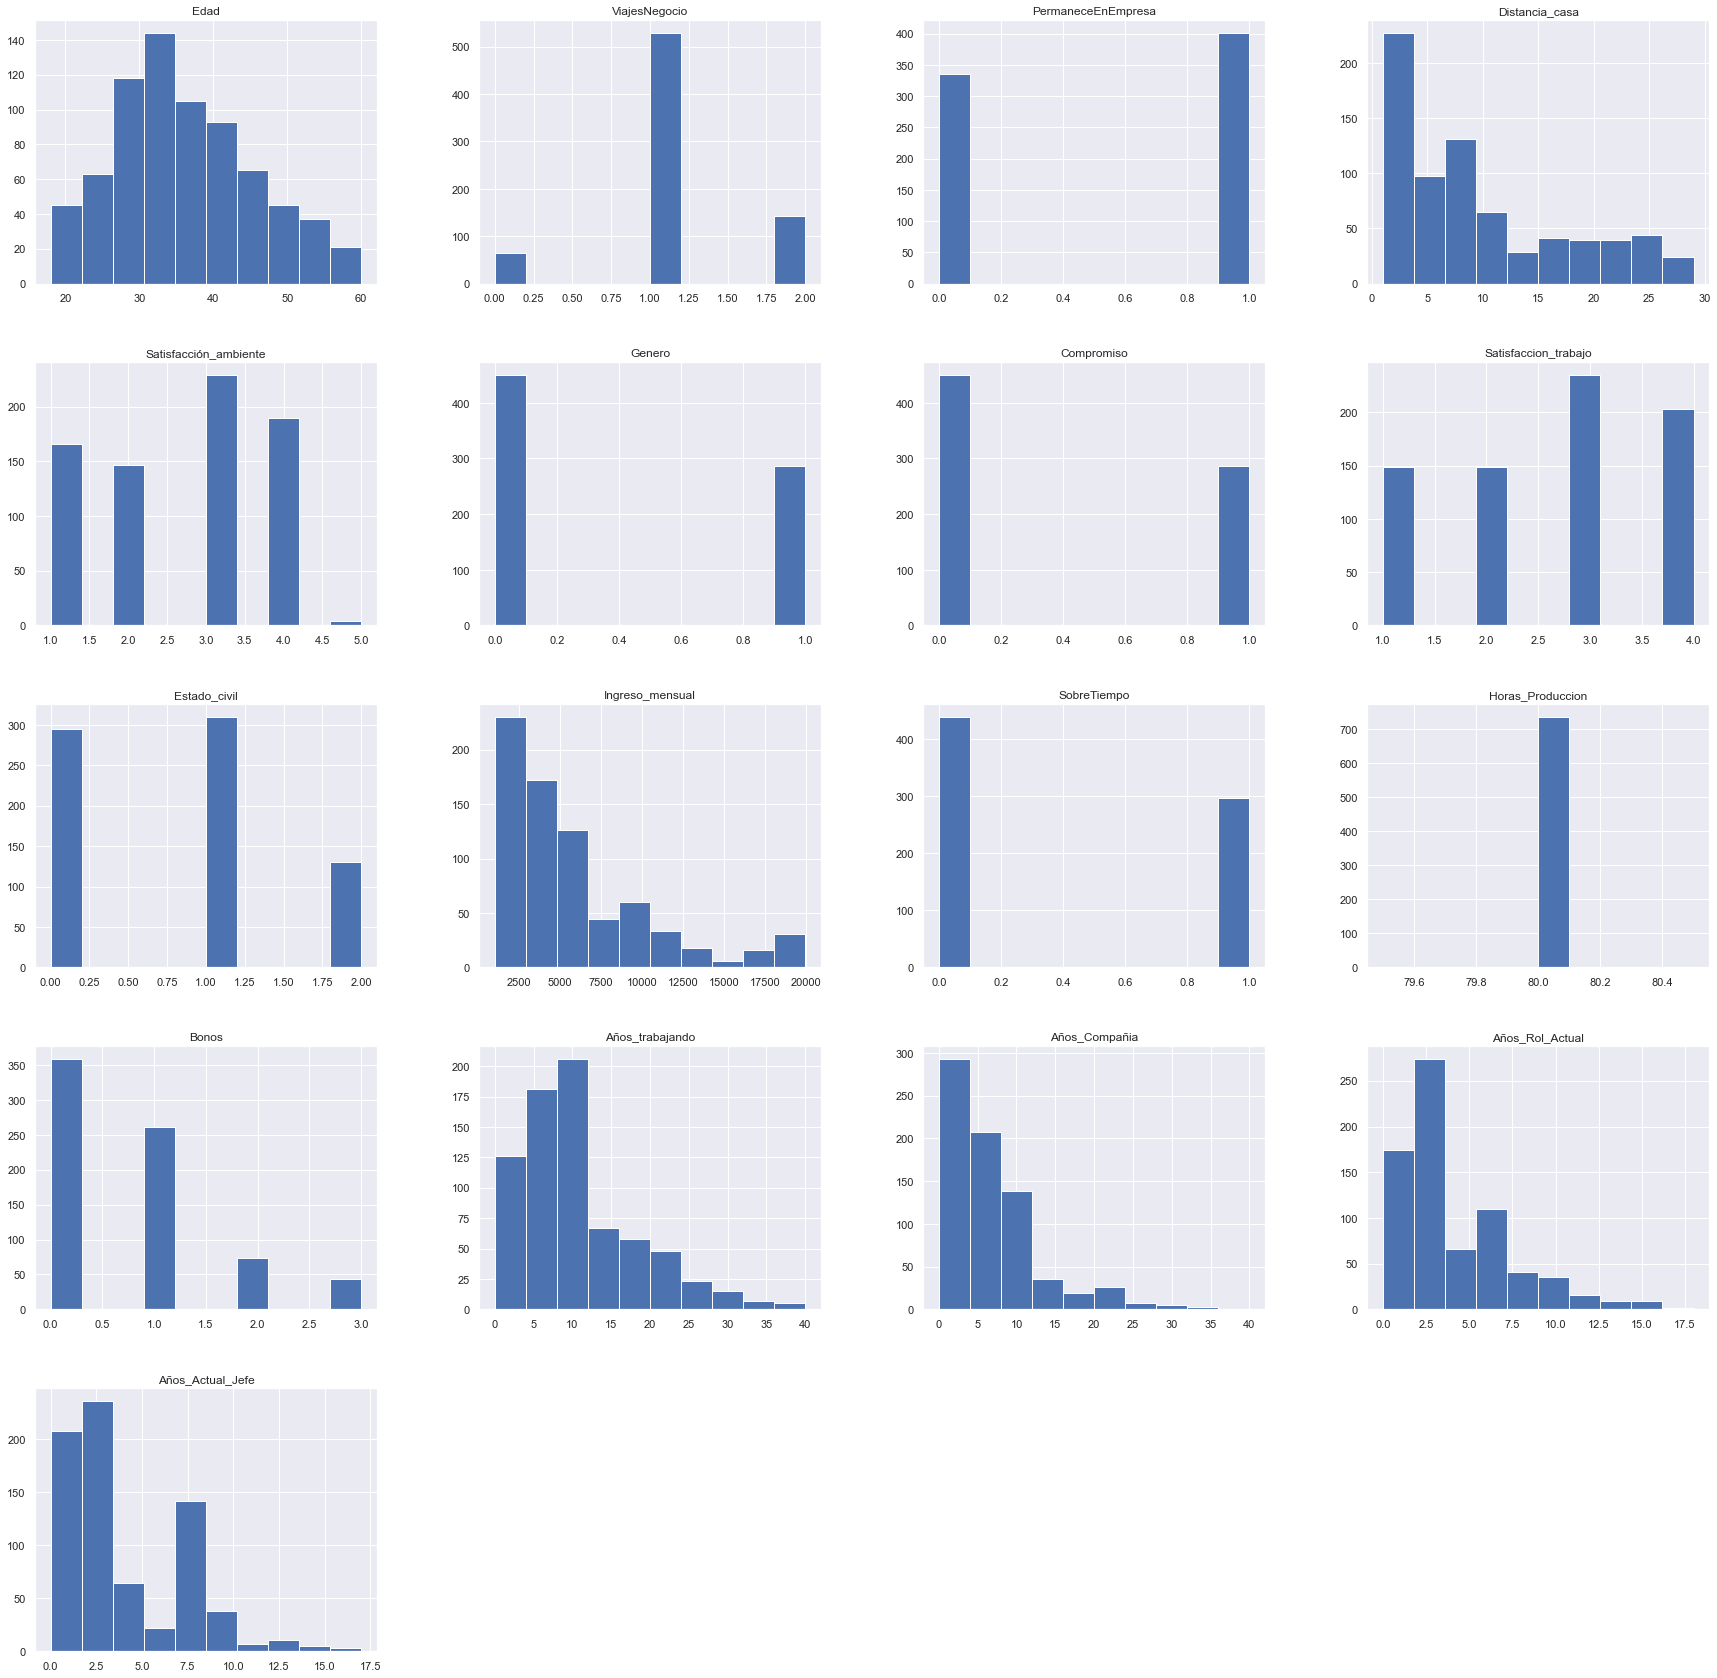

In [ ]:
# Se visualizan los histogramas
x.hist(figsize = (30,30))

### Reescalar

In [ ]:
trans = MinMaxScaler()
trans.fit(x)

pru = pd.DataFrame(trans.transform(x), columns = x.columns)
pru.describe()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.0,736.000000,736.000000,736.000000,736.000000,736.000000
mean,0.427957,0.552310,0.544837,0.305270,0.404552,0.388587,0.388587,0.556159,0.388587,0.261936,0.403533,0.0,0.242754,0.256352,0.160734,0.212938,0.217711
std,0.224906,0.260131,0.498324,0.285083,0.278131,0.487761,0.487761,0.362053,0.363962,0.236776,0.490939,0.0,0.288256,0.191053,0.152792,0.194767,0.202336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.500000,0.000000,0.071429,0.250000,0.000000,0.000000,0.333333,0.000000,0.086651,0.000000,0.0,0.000000,0.125000,0.050000,0.111111,0.058824
50%,0.380952,0.500000,1.000000,0.232143,0.500000,0.000000,0.000000,0.666667,0.500000,0.182820,0.000000,0.0,0.333333,0.225000,0.125000,0.111111,0.117647
75%,0.571429,0.500000,1.000000,0.500000,0.750000,1.000000,1.000000,1.000000,0.500000,0.343968,1.000000,0.0,0.333333,0.350000,0.225000,0.388889,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x['PermaneceEnEmpresa'].value_counts() #Para saber los valores de la variable objetivo

1    401
0    335
Name: PermaneceEnEmpresa, dtype: int64

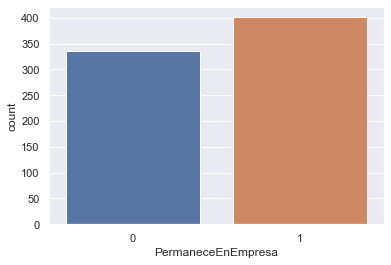

In [ ]:
# Podemos vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='PermaneceEnEmpresa', data=x)

### Arbol de decisión

In [ ]:
# Se selecciona la variable objetivo
Y = x['PermaneceEnEmpresa']
# Del conjunto de datos se elimina la variable target
X = x.drop(['PermaneceEnEmpresa'], axis=1)

In [ ]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# Crear el objeto de arbol de decisión.
arbol = DecisionTreeClassifier(criterion='gini', random_state=0)

In [ ]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

In [ ]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [ ]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[52, 29],
       [25, 78]])

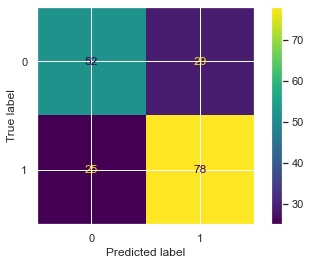

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()

In [ ]:
print(f'Exactitud: {accuracy_score(Y_test, y_pred)}' )
print(f"Recall: {recall_score(Y_test,y_pred)}")
print(f"Precisión: {precision_score(Y_test,y_pred)}")
print(f"Puntuación F1: {f1_score(Y_test,y_pred)}")

Exactitud: 0.7065217391304348
Recall: 0.7572815533980582
Precisión: 0.7289719626168224
Puntuación F1: 0.7428571428571429


In [ ]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        81
           1       0.73      0.76      0.74       103

    accuracy                           0.71       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.71      0.71       184



---- Verificación del criterio

En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:

criterion : {“gini”, “entropy”}, predeterminado = "gini".
La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

max_depth: int, predeterminado=None.
La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

min_samples_split : int or float, predeterminado=2.
El número mínimo de muestras necesarias para dividir un nodo interno.

Se usará le técnica de K-Fold Cross Validation para encontrar los hiperparámetros ideales.

In [ ]:
# Se fija el número de particiones. Se usará K = 10.
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Se establece el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 6, 8, 10, 20], 'min_samples_split': [2, 3, 4, 5]}

# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol_inicial = DecisionTreeClassifier(random_state = 0)

# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol_inicial, param_grid, cv = particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 5}

In [ ]:
# Obtener el mejor modelo.
arbol = mejor_modelo.best_estimator_
arbol

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=0)

### Evaluar arbol

In [ ]:
# Probemos ahora este modelo sobre test.
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print(f'Exactitud sobre entrenamiento: {accuracy_score(Y_train, y_pred_train)}')
print(f'Exactitud sobre test: {accuracy_score(Y_test, y_pred_test)}')



Exactitud sobre entrenamiento: 1.0
Exactitud sobre test: 0.7065217391304348


Se puede observar que la exactitud del modelo para categorizar correctamente es de 1.0 para los datos de entrenamiento y de 0.706 para los datos de prueba. Se procede a imprimir informes completos de desempeño (segregando el desempeño para cada categoría) y la matriz de confusión.

Datos de entranamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       298

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



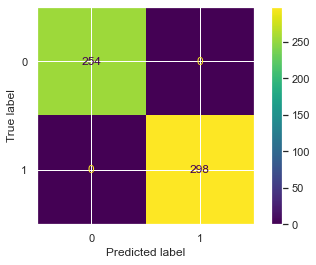

In [ ]:
# Se imprime el informe de rendimiento
print("Datos de entranamiento")
print(classification_report(Y_train, y_pred_train))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_train, Y_train)  
plt.show() 

### Interpretacion arbol

In [ ]:
# Obtener la importancia de las variables. Mientras mayor el coeficiente, más la importancia.
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns, "Importancia": arbol.feature_importances_})
importancia_atributo = importancia_atributo.sort_values(by = 'Importancia', ascending = False).reset_index(drop = True)
importancia_atributo

,Atributo,Importancia
0,Ingreso_mensual,0.187041
1,SobreTiempo,0.118010
2,Años_trabajando,0.101359
3,Edad,0.084899
4,Años_Compañia,0.082046
5,Años_Actual_Jefe,0.072744
6,Distancia_casa,0.071698
7,Satisfacción_ambiente,0.067950
8,Satisfaccion_trabajo,0.060294
9,Estado_civil,0.058241


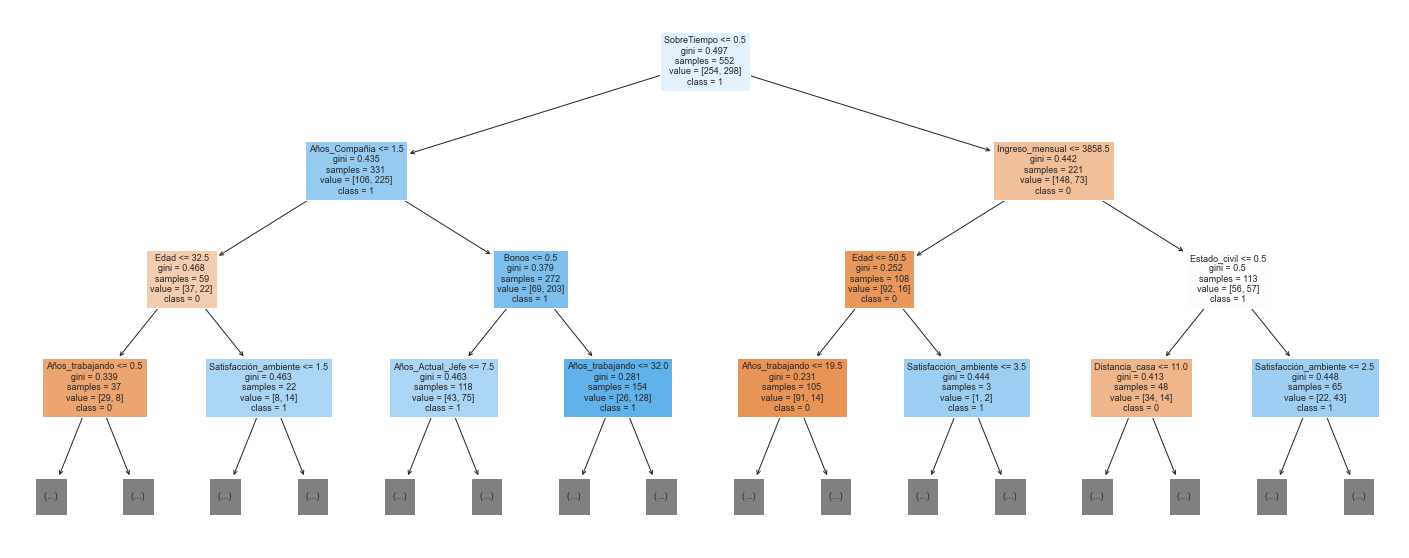

In [ ]:
#Gráfico de los primeros 3 niveles del árbol
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1", "2"], filled=True, fontsize=9)

In [ ]:
# Se calcula la probabilidad de que un dato cualquiera sea puesto en cada categoría
print(arbol.predict_proba(X_test.iloc[[117]]))

[[0. 1.]]


Por ejemplo, aquí el negocio podría saber que un contexto con las características del dato 117 de prueba tendría un 68% de ser categorizado como "No permanece en empresa", un 73% de ser categorizado como "Permanece en la empresa".

### Valor para el negocio
Se puede concluir que el modelo es de utilidad para el negocio y es funcional para sus requerimientos

El modelo permite concluir sobre la relación entre los factores de influencia asociados a los accidentes de tránsito y la gravedad de cada uno, de modo que puede obtener conocimiento que apoye en el desarrollo de planes de prevención

Como resultados del proyecto, se resalta la importancia que tienen el día de la semana, la condición de la vía, el límite de velocidad y el número de vehículos para determinar la gravedad de los accidentes

El diagrama completo del árbol le permite al negocio entender de forma transparente cómo afecta cada una de las variables, de forma que pueda optimizar sus esfuerzos de prevención de accidentes

El modelo presenta un desempeño bueno (aunque no exelente), que lo podría habilitar para ser usado como herramienta de apoyo en la toma de decisiones del negocio

### Valor para el negocio
Se puede concluir que el modelo es de utilidad para el negocio y es funcional para sus requerimientos

El modelo permite concluir sobre la relación entre los factores de influencia asociados a los casos de renuncia de los empleado y poder tomar medidas correspondientes con antelación.

Como resultados del proyecto, se resalta la importancia que el ingreso mensual, SObreTiempo, los Años_trabajando, la edad, los Años_Compañia, años_actual_jefe y la Distancia_casa.

El diagrama completo del árbol le permite al negocio entender de forma clara cómo afecta cada una de las variables, de forma que pueda optimizar sus esfuerzos en disminuir la desercion de empleados en la empresa.

El modelo presenta un desempeño bueno (aunque no exelente), que lo podría habilitar para ser usado como herramienta de apoyo en la toma de decisiones del negocio y mejorar los resultados.